Logistic Regression:
Accuracy: 0.7359
Precision: 0.6173
Recall: 0.6250
F1 Score: 0.6211
ROC AUC: 0.7099
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



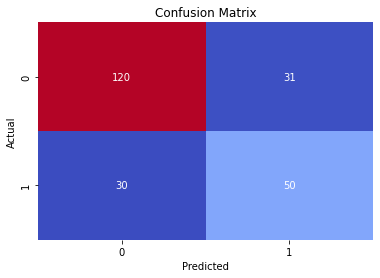

Decision Tree:
Accuracy: 0.7056
Precision: 0.5600
Recall: 0.7000
F1 Score: 0.6222
ROC AUC: 0.7043
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       151
           1       0.56      0.70      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



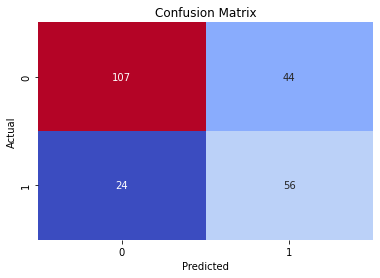

Random Forest:
Accuracy: 0.7576
Precision: 0.6463
Recall: 0.6625
F1 Score: 0.6543
ROC AUC: 0.7352
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



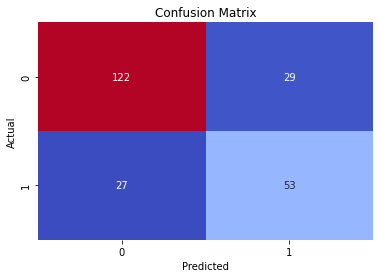

Gradient Boosting:
Accuracy: 0.7446
Precision: 0.6265
Recall: 0.6500
F1 Score: 0.6380
ROC AUC: 0.7224
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.63      0.65      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231



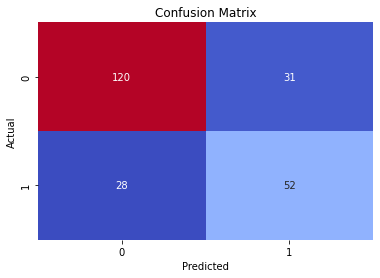

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Model:
Accuracy: 0.7576
Precision: 0.6500
Recall: 0.6500
F1 Score: 0.6500
ROC AUC: 0.7323
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



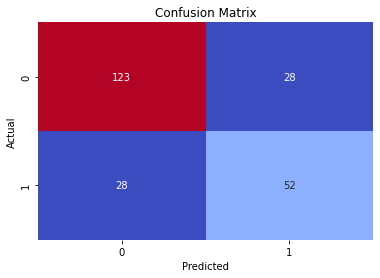

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('data/pima-indians-diabetes.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Logistic Regression:")
evaluate_model(log_reg, X_test, y_test)

# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
print("Decision Tree:")
evaluate_model(dt_clf, X_test, y_test)

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print("Random Forest:")
evaluate_model(rf_clf, X_test, y_test)

# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
print("Gradient Boosting:")
evaluate_model(gb_clf, X_test, y_test)

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Best Random Forest Model:")
evaluate_model(best_rf, X_test, y_test)


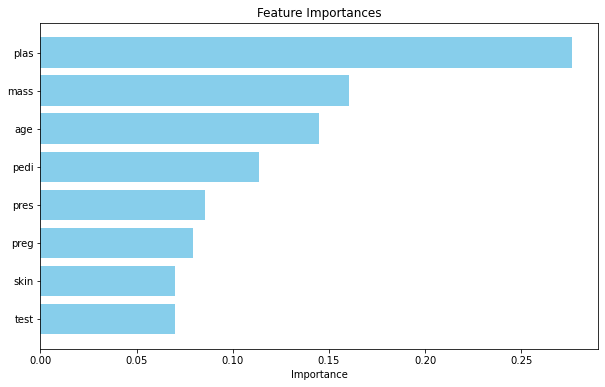

In [4]:
# Extracting feature importances
importances = best_rf.feature_importances_
features = X.columns

# Creating a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7576
Precision: 0.6500
Recall: 0.6500
F1 Score: 0.6500
ROC AUC: 0.7323
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



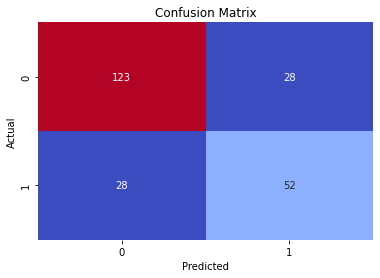

In [5]:
# Getting the best hyperparameters
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model
evaluate_model(best_rf, X_test, y_test)
